In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os
import scipy as sp

/Users/hsu022210/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***

<div class="alert alert-block alert-danger">
## *Alec Hsu*

***

# Homework Assignment \#2

*due Thursday, February 22nd at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homework_02.ipynb``` file as a template and write the answers in text and include relevant code below each question. Print this document, double-sided, staple it, and hand it in on Thursday, February 22nd at 12.45pm at the beinning of class.  

### Question 1

Maximum Likelihood Estimation (MLE) and Gradient Descent are two alternatives to Ordinary Least Squares that used to obtain estimates of the regression parameters. In fact, MLE and Gradient Descent are techniques often used in machine learning algorithms. Research and *briefly* discuss, both methods, their merits and their drawbacks. This answer should not exceed a page, and should probably not be shorter than a paragraph. Although the use of some light math is preferred, it is not required.

*Gradient Descent*

It's an algorithm being used to find the optimal weights that reduces error while predicting.

*Advantage*

Since we use the gradient everytime, we can found the nearest optimum with small amount of calculations.

*Disadvantage*

It doesn't find the global optimum because it depends on the starting point that we choose.


*Maximum Likelihood Estimation*

Maximum likelihood estimation means that if we have some random sample values X1, X2,.etc, and we assume the probability distribution depends on some unknown parameter $\theta$.

We want to find a point estimator u(X1, X2,..., Xn), so that u(x1, x2,..., xn) is a fairly good point estimate of $\theta$.

*Advantages*

Its mathematical and optimality properties are good tools for us to use while analyzing.

If we have a large amount of random samples from a population, theoretically, the mean of the parameter estimates will be the same as population value. On top of that, they have approximate normal distributions and approximate sample variances that can be used for analysis that we familiar, such as confidence interval, hypothesis tests, etc.

*Disadvantages*

Maximum likelihood estimates can be biased for relativily small samples.

### Question 2

Import `pga_data.csv`, data on professional male golfers. Regress `AvgDrive` ($y$), the mean length of a golfer's drive in yards, against `DrvAcc` ($x$), the percentage of times a golfer is able to land their ball on the fairway when driving the ball.

1. What is the equation of the fitted regression line?

    AvdDrive = -0.9516DrvAcc+348.1576

2. Compute the sum of the residuals squared, i.e., $\sum e_i^2$

    8374.0563

3. Create four other regression models whereby you come up with your own values for $b_0$ and $b_1$. Compute the sum of squared residuals for each model and fill in the table below. When complete, examine the $\sum e_i^2$ columna and comment on what you have learned/confirmed.


| Model #1 | $b_0$ | $b_1$ | $\sum e_i^2$ |
|----------|-------|-------|--------------|
|   OLS    |348.1576|-0.9516|8374.0563    |
|   1      |228.685|3722.026|8499.0453    |
|   2      |536.3152|-59.9370|8419.4861   |
|   3      |4.492e-65|1.112e-31|15902491.4|
|   4      |317.9830 |-0.0075 |8362.9155   |



In [63]:
pga_data = pd.read_csv('pga_data.csv')
pgaOLSmodel = sm.OLS.from_formula('AvgDrive ~ DrvAcc', pga_data)
pgaFit = pgaOLSmodel.fit()
pgaFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AvgDrive   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           2.07e-21
Time:                        11:41:56   Log-Likelihood:                -646.08
No. Observations:                 196   AIC:                             1296.
Df Residuals:                     194   BIC:                             1303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    348.1576      5.698     61.097      0.000     336.919     359.396
DrvAcc        -0.9516      0.089    -10.738      0.000      -1.126      -0.777
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.136
Skew:                           0.030   Prob(JB):                        0.934
Kurtosis:                       2.886   Cond. No.                         781.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
pgaFit.ssr

8374.0563758884109

In [65]:
pga_data_1 = pga_data.copy()
pga_data_1.loc[:,'DrvAcc'] = 1/pga_data_1.loc[:,'DrvAcc']
pgaOLSmodel = sm.OLS.from_formula('AvgDrive ~ DrvAcc', pga_data_1)
pgaFit = pgaOLSmodel.fit()
pgaFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AvgDrive   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           8.83e-21
Time:                        11:41:57   Log-Likelihood:                -647.53
No. Observations:                 196   AIC:                             1299.
Df Residuals:                     194   BIC:                             1306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    228.6850      5.578     41.001      0.000     217.685     239.685
DrvAcc      3722.0260    353.658     10.524      0.000    3024.517    4419.535
==============================================================================
Omnibus:                        0.007   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.087
Skew:                           0.005   Prob(JB):                        0.957
Kurtosis:                       2.897   Cond. No.                         748.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
pgaFit.ssr

8499.0453763028254

In [67]:
pga_data_2 = pga_data.copy()
pga_data_2.loc[:,'DrvAcc'] = np.log(pga_data_2.loc[:,'DrvAcc'])
pgaOLSmodel = sm.OLS.from_formula('AvgDrive ~ DrvAcc', pga_data_2)
pgaFit = pgaOLSmodel.fit()
pgaFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AvgDrive   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     113.6
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           3.52e-21
Time:                        11:41:58   Log-Likelihood:                -646.61
No. Observations:                 196   AIC:                             1297.
Df Residuals:                     194   BIC:                             1304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    536.3152     23.376     22.943      0.000     490.212     582.418
DrvAcc       -59.9370      5.622    -10.660      0.000     -71.026     -48.848
==============================================================================
Omnibus:                        0.019   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.108
Skew:                           0.015   Prob(JB):                        0.948
Kurtosis:                       2.889   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
pgaFit.ssr

8419.4861241104318

In [70]:
pga_data_3 = pga_data.copy()
pga_data_3.loc[:,'DrvAcc'] = np.exp(pga_data_3.loc[:,'DrvAcc'])
pgaOLSmodel = sm.OLS.from_formula('AvgDrive ~ DrvAcc', pga_data_3)
pgaFit = pgaOLSmodel.fit()
pgaFit.summary()

/Users/hsu022210/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AvgDrive   R-squared:                   -1190.066
Model:                            OLS   Adj. R-squared:              -1190.066
Method:                 Least Squares   F-statistic:                      -inf
Date:                Thu, 22 Feb 2018   Prob (F-statistic):                nan
Time:                        11:42:11   Log-Likelihood:                -1385.9
No. Observations:                 196   AIC:                             2774.
Df Residuals:                     195   BIC:                             2777.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.492e-65   2.45e-65      1.836      0.068   -3.34e-66    9.32e-65
DrvAcc      1.112e-31   6.06e-32      1.836      0.068   -8.28e-33    2.31e-31
==============================================================================
Omnibus:                      325.597   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44629.893
Skew:                          -8.207   Prob(JB):                         0.00
Kurtosis:                      75.080   Cond. No.                     3.40e+32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+32. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
pgaFit.ssr

15902491.482539564

In [72]:
pga_data_4 = pga_data.copy()
pga_data_4.loc[:,'DrvAcc'] *= pga_data_4.loc[:,'DrvAcc']
pgaOLSmodel = sm.OLS.from_formula('AvgDrive ~ DrvAcc', pga_data_4)
pgaFit = pgaOLSmodel.fit()
pgaFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AvgDrive   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     115.7
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           1.82e-21
Time:                        11:44:20   Log-Likelihood:                -645.95
No. Observations:                 196   AIC:                             1296.
Df Residuals:                     194   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    317.9830      2.902    109.570      0.000     312.259     323.707
DrvAcc        -0.0075      0.001    -10.757      0.000      -0.009      -0.006
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.174
Skew:                           0.048   Prob(JB):                        0.917
Kurtosis:                       2.890   Cond. No.                     2.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
pgaFit.ssr

8362.9155532164677

### Question 3

Import `platsicHardness.txt`. The first column of data represents plastic hardness in Brinell units ($y$) and the second column data represents the number of hours elapsed since the plastic was molded ($x$). Run a SLR model along with all relevant diagnostics---do not include numerical/graphical output, just a basic summary, written or tabular, of what you found. Succinctly discuss what you observe. Do you observe any issues with the model?

Run a Brown-Forsythe test to determine whether or not the error variances varies with the level of $x$. Divide the data into two groups, $x \leq 24$ and $x > 24$, and use $\alpha = 0.05$. State the hypothesis test, decision rule, and the conclusion. Discuss this result in context of what you discovered earlier. 

In [37]:
plastic_data = pd.read_csv('plasticHardness.csv')
plasticOLSmodel = sm.OLS.from_formula('Brinell ~ HoursElapsed', plastic_data)
plasticFit = plasticOLSmodel.fit()
plasticFit.summary()

/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Brinell   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           2.16e-12
Time:                        11:02:59   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      168.6000      2.657     63.454      0.000     162.901     174.299
HoursElapsed     2.0344      0.090     22.506      0.000       1.840       2.228
==============================================================================
Omnibus:                        0.955   Durbin-Watson:                   2.466
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.711
Skew:                           0.068   Prob(JB):                        0.701
Kurtosis:                       1.976   Cond. No.                         96.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
plastic_data_lesseq24 = plastic_data.loc[plastic_data['HoursElapsed'] <= 24]
plastic_data_more24 = plastic_data.loc[plastic_data['HoursElapsed'] > 24]

plasticless24OLSmodel = sm.OLS.from_formula('Brinell ~ HoursElapsed', plastic_data_lesseq24)
plasticless24Fit = plasticless24OLSmodel.fit()

plasticmore24OLSmodel = sm.OLS.from_formula('Brinell ~ HoursElapsed', plastic_data_more24)
plasticmore24Fit = plasticmore24OLSmodel.fit()
sp.stats.levene(plasticless24Fit.resid[:], plasticmore24Fit.resid[:], center = 'median')
# sp.stats.levene(plasticFit.resid[0:7], plasticFit.resid[8:], center = 'median')

LeveneResult(statistic=0.1721311475409836, pvalue=0.68451239959638732)

### Question 4

Import `copierMaintenanceData.csv`. Column 1 is $y$ and column 2 is $x$.

$x$ are the number of photocopiers serviced by a service company at a given location, and $y$ are the total number of minutes spent by the service person. 

Answer the following questions.

1. Obtain the OLS estimates of the parameters. 
2. Write out the fitted regression equation.
3. What is the numerical value of $\sum e_i^2$?
4. Does $b_0$ provide any relevant information in this context?
5. Obtain a point estimate of the mean service time when 5 copiers are serviced.
6. Compute the confidence and prdiction intervals when 5 copiers are serviced.
7. Test the hypothesis that $H_0: \beta_1 = 0$ using a $t$ test. Show all work.

In [6]:
copier_data = pd.read_csv('copierMaintenanceData.csv')
copierOLSmodel = sm.OLS.from_formula('totalMinutes ~ noOfPhotocopiers', copier_data)
copierFit = copierOLSmodel.fit()
copierFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           totalMinutes   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     968.7
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           4.01e-31
Time:                        10:13:36   Log-Likelihood:                -161.27
No. Observations:                  45   AIC:                             326.5
Df Residuals:                      43   BIC:                             330.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5802      2.804     -0.207      0.837      -6.235       5.075
noOfPhotocopiers    15.0352      0.483     31.123      0.000      14.061      16.009
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.167
Skew:                          -0.388   Prob(JB):                        0.558
Kurtosis:                       2.853   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4-1

In [14]:
copierFit.params

Intercept           -0.580157
noOfPhotocopiers    15.035248
dtype: float64

4-2

$y=15.035248x-0.580157$

4-3

In [18]:
copierFit.ssr

3416.377023498696

4-4

Since $b_0$ is negative, which means we should not predict any result when x is 0 or any input that cause y negative, it doesn't make sense when y (Total minutes) is negative.

4-5

In [21]:
copier_data.loc[copier_data['noOfPhotocopiers'] == 5].mean()

totalMinutes        77.875
noOfPhotocopiers     5.000
dtype: float64

mean service time: 77.875 minutes

4-6

In [22]:
copierOLSmodel = sm.OLS.from_formula('totalMinutes ~ noOfPhotocopiers', copier_data.loc[copier_data['noOfPhotocopiers'] == 5])
copierFit = copierOLSmodel.fit()
copierFit.summary()

/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
/Users/hsu022210/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           totalMinutes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Feb 2018   Prob (F-statistic):                nan
Time:                        10:39:49   Log-Likelihood:                -28.719
No. Observations:                   8   AIC:                             59.44
Df Residuals:                       7   BIC:                             59.52
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.9952      0.127     23.502      0.000       2.694       3.297
noOfPhotocopiers    14.9760      0.637     23.502      0.000      13.469      16.483
==============================================================================
Omnibus:                        1.990   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                0.773
Skew:                           0.164   Prob(JB):                        0.679
Kurtosis:                       1.512   Cond. No.                     2.37e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.71e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Confidence level: 95%, Prediction Interval: 13.469-16.489

4-7

$H_0: \beta_1 = 0$

$H_1: \beta_1 \neq 0$

t_critical: 23.502

t*: 2.365

p-value: around 0.000

we reject the null hypothesis

### Question 5

1. Create a vector of 10,000,000 random variables $\sim \mathcal{U}\{0,1\}$ and store them in the list called `myRndUnif`. Randomly sample 100,000 values `myRndUnif` from this vector and create a histogram from the sample. What is the distribution of the sample (visually)? Repeat this exercise a few more times, if necessary, to convince yourself that when randomly sampling from a $\mathcal{U}\{a,b\}$ distribution, the sample is also $\sim \mathcal{U}\{a,b\}$.

2. Randomly sample 100,000 **pairs** of values (groups of 2), and create a histogram of the mean of these samples. What does the distribution look like?

3. Randomly sample 100,000 **groups of five values**, and create a histogram of the mean of these samples. What does the distribution look like?

4. Randomly sample 100,000 **groups of ten values**, and create a histogram of the mean of these samples. What does the distribution look like?

5. Randomly sample 100,000 **groups of thirty values**, and create a histogram of the mean of these samples. What does the distribution look like?

6. Repeat steps 1 through 5 using an **exponential distribution**.

5-1

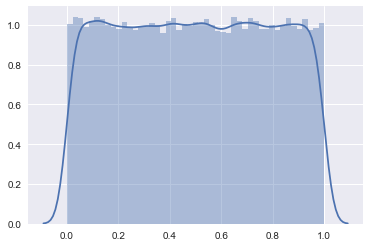

In [2]:
myRndUnif = np.random.uniform(0,1,10000000)
sample = np.random.choice(myRndUnif, 100000)
sns.distplot(sample);

5-2

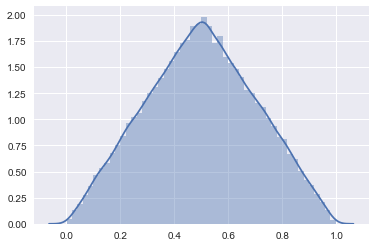

In [6]:
npsample2 = np.random.choice(myRndUnif, 200000)
sample2 = [sum(npsample2[x:x+2])/2 for x in range(0, len(npsample2), 2)]
sns.distplot(sample2);

5-3

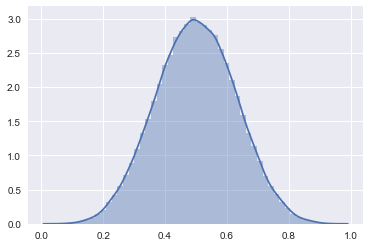

In [7]:
npsample3 = np.random.choice(myRndUnif, 500000)
sample3 = [sum(npsample3[x:x+5])/5 for x in range(0, len(npsample3), 5)]
sns.distplot(sample3);

5-4

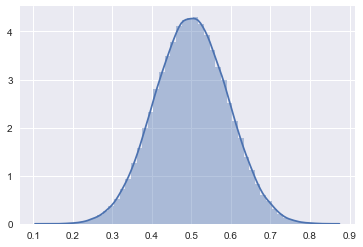

In [8]:
npsample4 = np.random.choice(myRndUnif, 1000000)
sample4 = [sum(npsample4[x:x+10])/10 for x in range(0, len(npsample4), 10)]
sns.distplot(sample4);

5-5

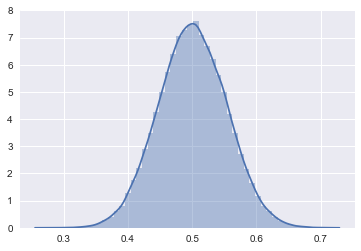

In [9]:
npsample5 = np.random.choice(myRndUnif, 3000000)
sample5 = [sum(npsample5[x:x+30])/30 for x in range(0, len(npsample5), 30)]
sns.distplot(sample5);

### Question 6

You compute a coefficient of determination for a regression model an obtain an $R^2=0.832$. What does the strength of the coefficient of determination say about the causal relationship between the explanatory and response variables?

We have 83% as the ratio of the proportionate reduction of total variation associated with the use of the explanatory variable X

### Question 7

When testing for the normality of residuals, I suggested you use a normality test such as the Shapiro-Wilk test. 

1. Read the entry at the following link: https://www.r-bloggers.com/normality-tests-don%E2%80%99t-do-what-you-think-they-do/

2. Generate 10,000 standard normal random variates, and run a Shapiro-Wilk test on them to test for normality, using the Shapiro Wilk test in in the `SciPy` package. Why does this fail? What internal limitations are included in `scipy.stats.shipro()` to ensure that the problems described in the URL above don't occur?

In [48]:
sw_random_var = np.random.uniform(0,1,10000)
sp.stats.shapiro(sw_random_var)

/Users/hsu022210/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9554533958435059, 0.0)

Since our p-value is 0.0, we reject the null hypothesis.

### Question 8

Import `pga_data.csv`, data on professional male golfers. Regress `AvgDrive` ($y$), the mean length of a golfer's drive in yards, against `DrvAcc` ($x$), the percentage of times a golfer is able to land their ball on the fairway when driving the ball. Manually code up a numerical Box-Cox search procedure for $\lambda \in [-5, 5]$ in increments of 0.1 to find the $\lambda$ that minimizes SSE for this model. Create a graph with $\lambda$ on the $x$-axis and $SSE_{\lambda}$ on the $y$-axis. Report the $\lambda$ that minimizes SSE for this model.

In [32]:
pga_data = pd.read_csv('pga_data.csv')
pgaOLSmodel = sm.OLS.from_formula('AvgDrive ~ DrvAcc', pga_data)
pgaFit = pgaOLSmodel.fit()
pgaFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AvgDrive   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           2.07e-21
Time:                        02:30:28   Log-Likelihood:                -646.08
No. Observations:                 196   AIC:                             1296.
Df Residuals:                     194   BIC:                             1303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    348.1576      5.698     61.097      0.000     336.919     359.396
DrvAcc        -0.9516      0.089    -10.738      0.000      -1.126      -0.777
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.136
Skew:                           0.030   Prob(JB):                        0.934
Kurtosis:                       2.886   Cond. No.                         781.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""